In [16]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
# Charger la dataset spam.xlsx'
#Affciher l'entête avec head
# Load Dataset
data = pd.read_csv('Medical_Data_Text_mining.csv')
data.head()

,label,texte
0,4,Catheterization laboratory events and hospital...
1,5,Renal abscess in children. Three cases of rena...
2,2,Hyperplastic polyps seen at sigmoidoscopy are ...
3,5,Subclavian artery to innominate vein fistula a...
4,4,Effect of local inhibition of gamma-aminobutyr...


Classe 4 - Mots les plus fréquents:
patients: 8202
coronary: 2512
pressure: 2161
blood: 2125
ventricular: 2011
group: 1993
disease: 1919
artery: 1849
heart: 1705
left: 1600


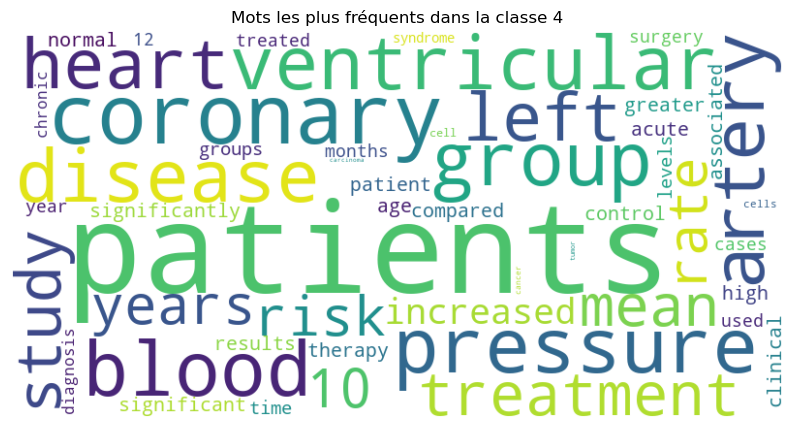

Classe 5 - Mots les plus fréquents:
patients: 11023
group: 2175
disease: 1983
treatment: 1916
study: 1827
patient: 1676
cases: 1545
acute: 1480
years: 1465
results: 1437


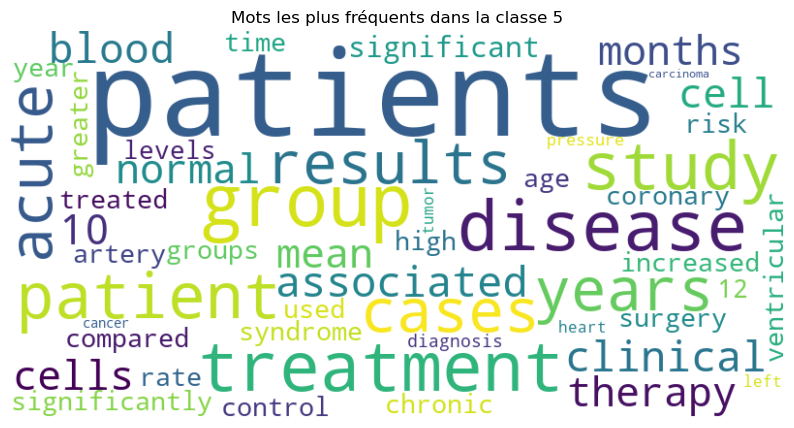

Classe 2 - Mots les plus fréquents:
patients: 4200
disease: 1229
treatment: 700
group: 629
study: 579
patient: 552
chronic: 482
associated: 479
normal: 445
cases: 444


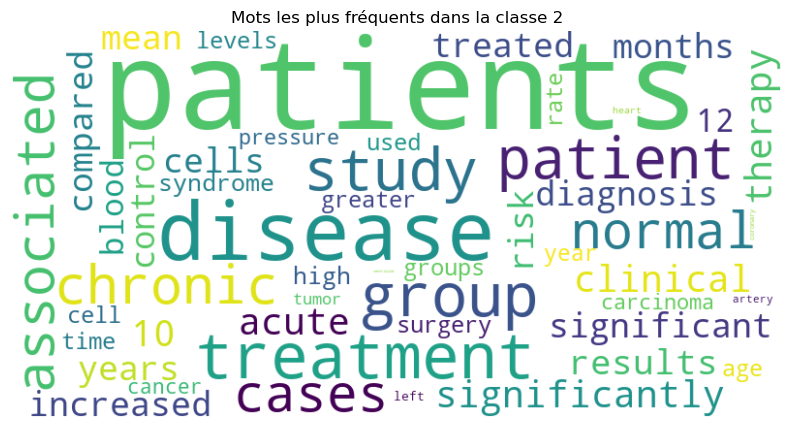

Classe 1 - Mots les plus fréquents:
patients: 7055
cancer: 2694
cell: 2600
tumor: 2559
cells: 2341
carcinoma: 1867
treatment: 1549
disease: 1515
cases: 1457
study: 1078


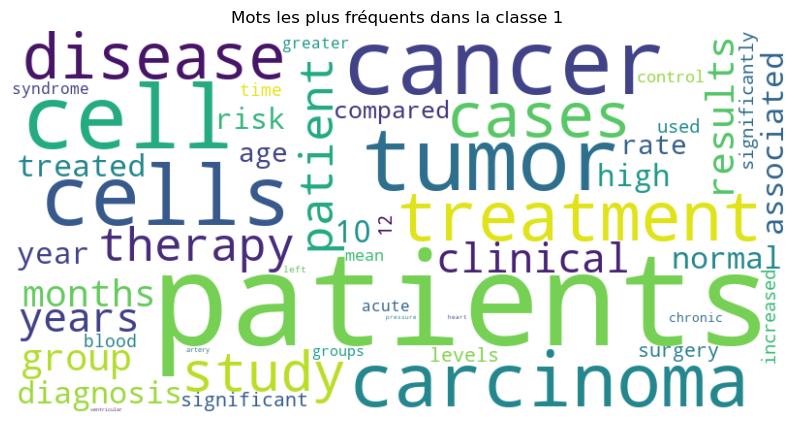

Classe 3 - Mots les plus fréquents:
patients: 3964
disease: 858
treatment: 720
group: 692
study: 683
clinical: 649
patient: 642
syndrome: 567
years: 544
results: 529


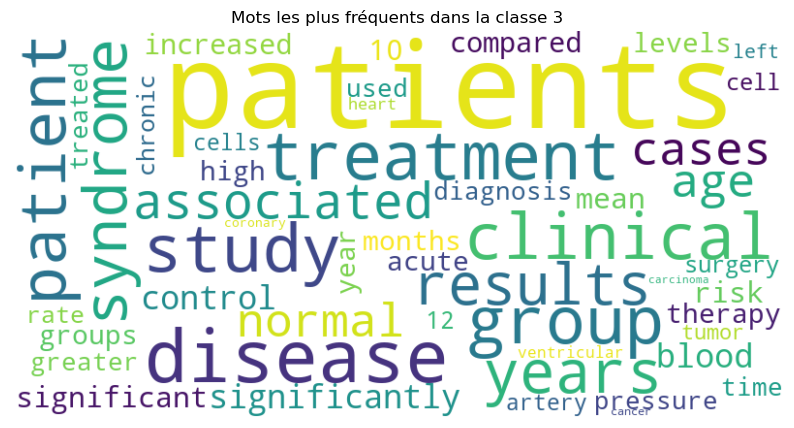

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Vectorisation des mots
vectorizer = CountVectorizer(stop_words='english', max_features=50)  # Ajustez max_features selon le nombre de mots que vous voulez
X = vectorizer.fit_transform(data['texte'])

# Obtention des termes
terms = vectorizer.get_feature_names_out()

# Affichage des mots les plus fréquents et leur fréquence pour chaque classe
for label in data['label'].unique():
    # Extraire les documents de la classe
    class_documents = data[data['label'] == label]['texte']
    
    # Appliquer la vectorisation
    class_X = vectorizer.transform(class_documents)
    
    # Calcul des fréquences
    word_frequencies = class_X.sum(axis=0).A1
    
    # Créer un dictionnaire des mots et de leur fréquence
    word_freq_dict = dict(zip(terms, word_frequencies))
    
    # Trier par fréquence décroissante et sélectionner les 10 premiers mots
    sorted_word_freq = sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True)[:10]
    
    # Afficher les 10 mots les plus fréquents et leurs fréquences
    print(f"Classe {label} - Mots les plus fréquents:")
    for word, freq in sorted_word_freq:
        print(f"{word}: {freq}")
    
    # Générer un nuage de mots
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)
    
    # Affichage du nuage de mots
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Mots les plus fréquents dans la classe {label}')
    plt.axis('off')
    plt.show()

Classe 4 - Fréquence des mots:
patients       8202
coronary       2512
pressure       2161
blood          2125
ventricular    2011
group          1993
disease        1919
artery         1849
heart          1705
left           1600
Name: 4, dtype: int64
----------------------------------------


C:\Users\DELL\AppData\Local\Temp\ipykernel_15448\2191688137.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_words.index, y=top_10_words.values, palette='Blues_d')


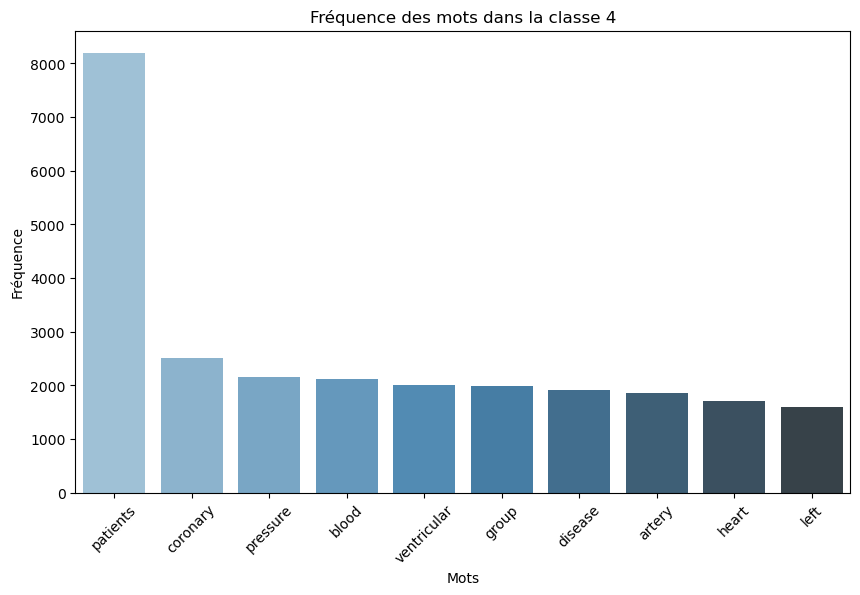

Classe 5 - Fréquence des mots:
patients     11023
group         2175
disease       1983
treatment     1916
study         1827
patient       1676
cases         1545
acute         1480
years         1465
results       1437
Name: 5, dtype: int64
----------------------------------------


C:\Users\DELL\AppData\Local\Temp\ipykernel_15448\2191688137.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_words.index, y=top_10_words.values, palette='Blues_d')


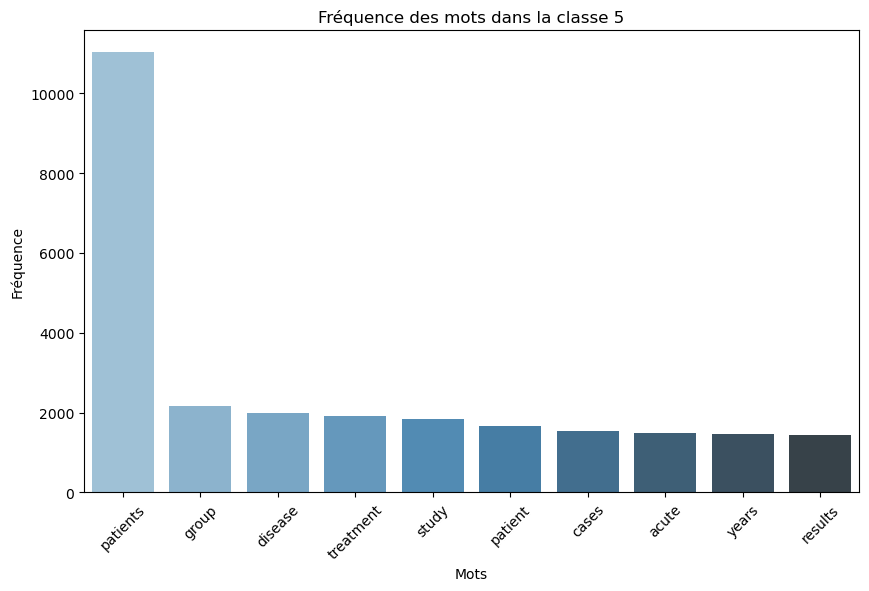

Classe 2 - Fréquence des mots:
patients     4200
disease      1229
liver         720
treatment     700
group         629
study         579
patient       552
gastric       517
hepatitis     484
chronic       482
Name: 2, dtype: int64
----------------------------------------


C:\Users\DELL\AppData\Local\Temp\ipykernel_15448\2191688137.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_words.index, y=top_10_words.values, palette='Blues_d')


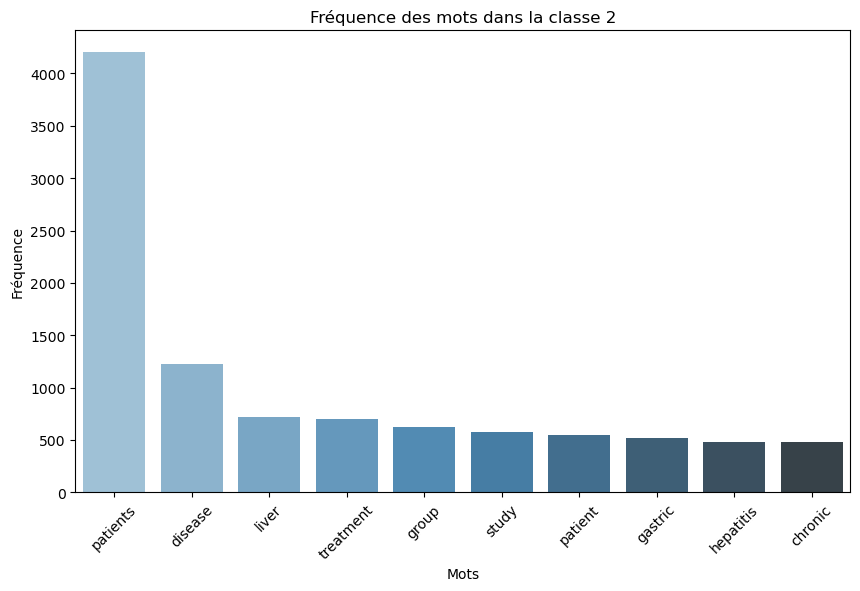

Classe 1 - Fréquence des mots:
patients     7055
cancer       2694
cell         2600
tumor        2559
cells        2341
carcinoma    1867
tumors       1665
treatment    1549
disease      1515
cases        1457
Name: 1, dtype: int64
----------------------------------------


C:\Users\DELL\AppData\Local\Temp\ipykernel_15448\2191688137.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_words.index, y=top_10_words.values, palette='Blues_d')


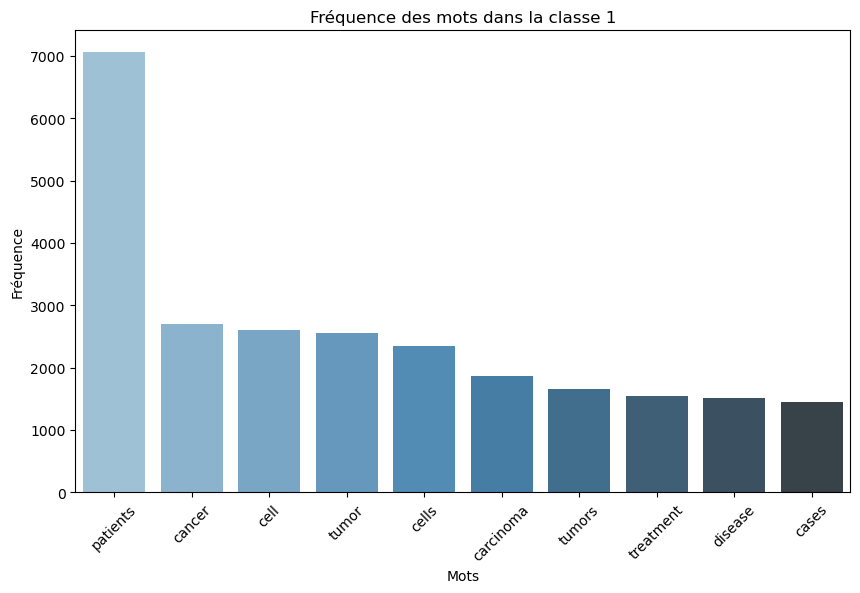

Classe 3 - Fréquence des mots:
patients     3964
disease       858
treatment     720
pain          694
group         692
study         683
brain         664
clinical      649
patient       642
cerebral      628
Name: 3, dtype: int64
----------------------------------------


C:\Users\DELL\AppData\Local\Temp\ipykernel_15448\2191688137.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_words.index, y=top_10_words.values, palette='Blues_d')


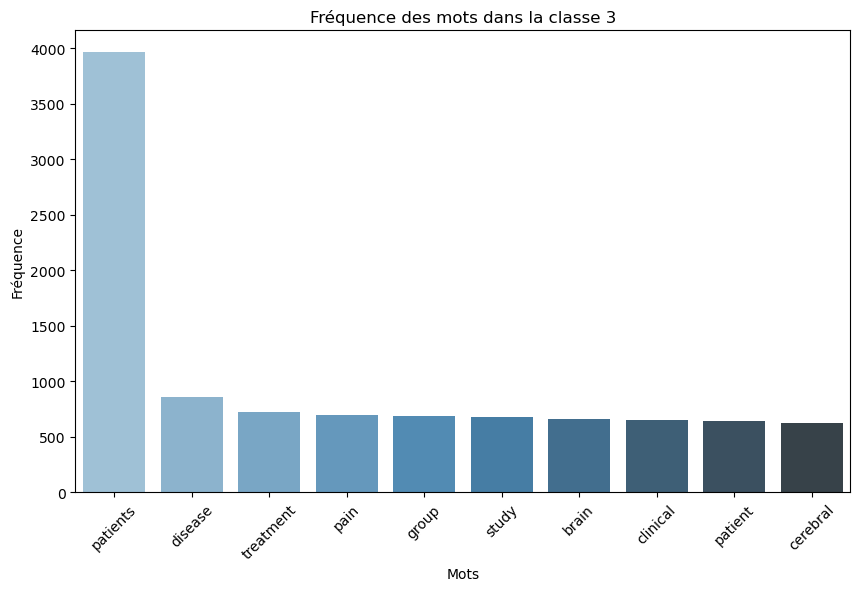

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Vectorisation des mots avec CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['texte'])

# Obtention des termes
terms = vectorizer.get_feature_names_out()

# Créer un DataFrame des fréquences de chaque mot par classe
word_frequencies_per_class = pd.DataFrame(X.toarray(), columns=terms)

# Ajouter la colonne 'label' pour chaque classe
word_frequencies_per_class['label'] = data['label']

# Calculer la fréquence d'apparition des mots pour chaque classe
word_frequencies_by_class = word_frequencies_per_class.groupby('label').sum()

# Afficher la fréquence des mots pour chaque classe
for label in data['label'].unique():
    print(f"Classe {label} - Fréquence des mots:")
    
    # Sélectionner les 10 mots les plus fréquents pour chaque classe
    top_10_words = word_frequencies_by_class.loc[label].sort_values(ascending=False).head(10)
    
    print(top_10_words)
    print("-" * 40)

    # Visualiser la fréquence des mots
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_10_words.index, y=top_10_words.values, palette='Blues_d')
    plt.title(f"Fréquence des mots dans la classe {label}")
    plt.xlabel("Mots")
    plt.ylabel("Fréquence")
    plt.xticks(rotation=45)
    plt.show()

In [18]:
#supprimeer les colonne : Class
corpus = data[['texte']]
corpus = np.array(corpus)
corpus

array([['Catheterization laboratory events and hospital outcome with direct angioplasty for acute myocardial infarction To assess the safety of direct infarct angioplasty without antecedent thrombolytic therapy, catheterization laboratory and hospital events were assessed in consecutively treated patients with infarctions involving the left anterior descending (n = 100 patients), right (n = 100), and circumflex (n = 50) coronary arteries. The groups of patients were similar for age (left anterior descending coronary artery, 59 years; right coronary artery, 58 years; circumflex coronary artery, 62 years), patients with multivessel disease (left anterior descending coronary artery, 55%; right coronary artery, 55%; circumflex coronary artery, 64%), and patients with initial grade 0/1 antegrade flow (left anterior descending coronary artery, 79%; right coronary artery, 84%; circumflex coronary artery, 90%). Cardiogenic shock was present in eight patients with infarction of the left anterio

In [22]:
'''import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Les installation des packages (mots vides) -> Un seule fois
nltk.download('stopwords')
nltk.download('punkt')'''

"import warnings\nwarnings.simplefilter(action='ignore', category=FutureWarning)\n# Les installation des packages (mots vides) -> Un seule fois\nnltk.download('stopwords')\nnltk.download('punkt')"

In [19]:
# importer le stemmer
# Même pré-traitement : normalize_document
import nltk
import re

stop_words = nltk.corpus.stopwords.words('english')
ps = nltk.porter.PorterStemmer()

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    #doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords
    filtered_tokens = [token for token in tokens if token not in stop_words]
    doc = ' '.join(filtered_tokens)
    doc = ' '.join([ps.stem(word) for word in doc.split()])
    return doc

In [20]:
#Nomalisation de corpus avec Numpy , Vectorizer , normalize_corpus
normalize_corpus = np.vectorize(normalize_document)
norm_corpus = normalize_corpus(corpus)
norm_corpus

array([['catheter laboratori event hospit outcom direct angioplasti acut myocardi infarct to assess safeti direct infarct angioplasti without anteced thrombolyt therapi catheter laboratori hospit event assess consecut treat patient infarct involv left anterior descend n patient right n circumflex n coronari arteri the group patient similar age left anterior descend coronari arteri year right coronari arteri year circumflex coronari arteri year patient multivessel diseas left anterior descend coronari arteri right coronari arteri circumflex coronari arteri patient initi grade antegrad flow left anterior descend coronari arteri right coronari arteri circumflex coronari arteri cardiogen shock present eight patient infarct left anterior descend coronari arteri four infarct right coronari arteri four infarct circumflex coronari arteri major catheter laboratori event cardiovers cardiopulmonari resuscit dopamin intraaort balloon pump support hypotens urgent surgeri occur patient infarct left 

In [21]:
print(norm_corpus[:10])  # Affiche les 10 premiers éléments du corpus normalisé

[['catheter laboratori event hospit outcom direct angioplasti acut myocardi infarct to assess safeti direct infarct angioplasti without anteced thrombolyt therapi catheter laboratori hospit event assess consecut treat patient infarct involv left anterior descend n patient right n circumflex n coronari arteri the group patient similar age left anterior descend coronari arteri year right coronari arteri year circumflex coronari arteri year patient multivessel diseas left anterior descend coronari arteri right coronari arteri circumflex coronari arteri patient initi grade antegrad flow left anterior descend coronari arteri right coronari arteri circumflex coronari arteri cardiogen shock present eight patient infarct left anterior descend coronari arteri four infarct right coronari arteri four infarct circumflex coronari arteri major catheter laboratori event cardiovers cardiopulmonari resuscit dopamin intraaort balloon pump support hypotens urgent surgeri occur patient infarct left anteri

In [52]:
# Importer les bibliothèques nécessaires
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from scipy.stats import mode

# Transformation en vecteurs TF-IDF
tfidf_vectorizer = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['texte'])  # Utiliser la colonne 'texte'
tfidf_matrix = tfidf_matrix.toarray()

# Séparation des données en ensemble d'entraînement et de test
X = tfidf_matrix  # Matrice des caractéristiques
y = data['label']  # Utiliser les labels directement

# Séparer les données en 80% entraînement et 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Noms des classes
class_names = ['neoplasms', 'digestive system diseases', 'nervous system diseases', 'cardiovascular diseases', 'general pathological conditions']

# Modèle 1 : Random Forest
print("Modèle Random Forest")
rf_model = RandomForestClassifier(n_estimators=200, max_depth=42, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Évaluation du modèle Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf * 100:.2f}%")
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf, target_names=class_names))

# Modèle 2 : K-Nearest Neighbors (KNN)
print("\nModèle K-Nearest Neighbors (KNN)")
knn_model = KNeighborsClassifier(n_neighbors=77)  # Ajuster le nombre de voisins si nécessaire
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Évaluation du modèle KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_knn * 100:.2f}%")
print("\nClassification Report (KNN):")
print(classification_report(y_test, y_pred_knn, target_names=class_names))

# Modèle 3 : K-means (pour clustering non supervisé)
print("\nModèle K-means (Clustering)")
kmeans_model = KMeans(n_clusters=5, random_state=42)  # Cinq clusters pour les cinq classes
kmeans_model.fit(X_train)

# Utilisation des clusters pour prédire les classes
y_pred_kmeans_train = kmeans_model.predict(X_train)
y_pred_kmeans_test = kmeans_model.predict(X_test)

# Ajustement des labels de K-means pour correspondre à y_train
labels_train = np.zeros_like(y_pred_kmeans_train)
for i in range(5):  # Pour chaque cluster, on trouve la majorité des vraies étiquettes
    mask = (y_pred_kmeans_train == i)
    labels_train[mask] = mode(y_train[mask])[0]

# Appliquer ce mappage aux prédictions du test
labels_test = np.zeros_like(y_pred_kmeans_test)
for i in range(5):
    mask = (y_pred_kmeans_test == i)
    labels_test[mask] = mode(y_train[y_pred_kmeans_train == i])[0]

# Évaluation du modèle K-means
accuracy_kmeans = accuracy_score(y_test, labels_test)
print(f"Accuracy: {accuracy_kmeans * 100:.2f}%")
print("\nClassification Report (K-means):")
print(classification_report(y_test, labels_test, target_names=class_names))

# Modèle 4 : Arbre de Décision
print("\nModèle Arbre de Décision")
dt_model = DecisionTreeClassifier(max_depth=32, random_state=42)  # Ajuster les paramètres si nécessaire
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Évaluation du modèle Arbre de Décision
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy_dt * 100:.2f}%")
print("\nClassification Report (Arbre de Décision):")
print(classification_report(y_test, y_pred_dt, target_names=class_names))

# Comparaison des quatres modèles
print("\nComparaison des performances :")
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")
print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")
print(f"Arbre de Décision Accuracy: {accuracy_dt * 100:.2f}%")
print(f"K-means Accuracy: {accuracy_kmeans * 100:.2f}%")

Modèle Random Forest
Accuracy: 45.19%

Classification Report (Random Forest):
                                 precision    recall  f1-score   support

                      neoplasms       0.64      0.58      0.61       647
      digestive system diseases       0.16      0.05      0.08       315
        nervous system diseases       0.27      0.09      0.13       370
        cardiovascular diseases       0.60      0.53      0.56       621
general pathological conditions       0.36      0.59      0.45       935

                       accuracy                           0.45      2888
                      macro avg       0.41      0.37      0.37      2888
                   weighted avg       0.44      0.45      0.43      2888


Modèle K-Nearest Neighbors (KNN)
Accuracy: 62.02%

Classification Report (KNN):
                                 precision    recall  f1-score   support

                      neoplasms       0.66      0.81      0.73       647
      digestive system diseases   

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 45.29%

Classification Report (Arbre de Décision):
                                 precision    recall  f1-score   support

                      neoplasms       0.62      0.54      0.57       647
      digestive system diseases       0.37      0.25      0.30       315
        nervous system diseases       0.33      0.23      0.27       370
        cardiovascular diseases       0.57      0.47      0.51       621
general pathological conditions       0.38      0.54      0.44       935

                       accuracy                           0.45      2888
                      macro avg       0.45      0.41      0.42      2888
                   weighted avg       0.46      0.45      0.45      2888


Comparaison des performances :
Random Forest Accuracy: 45.19%
KNN Accuracy: 62.02%
Arbre de Décision Accuracy: 45.29%
K-means Accuracy: 42.42%


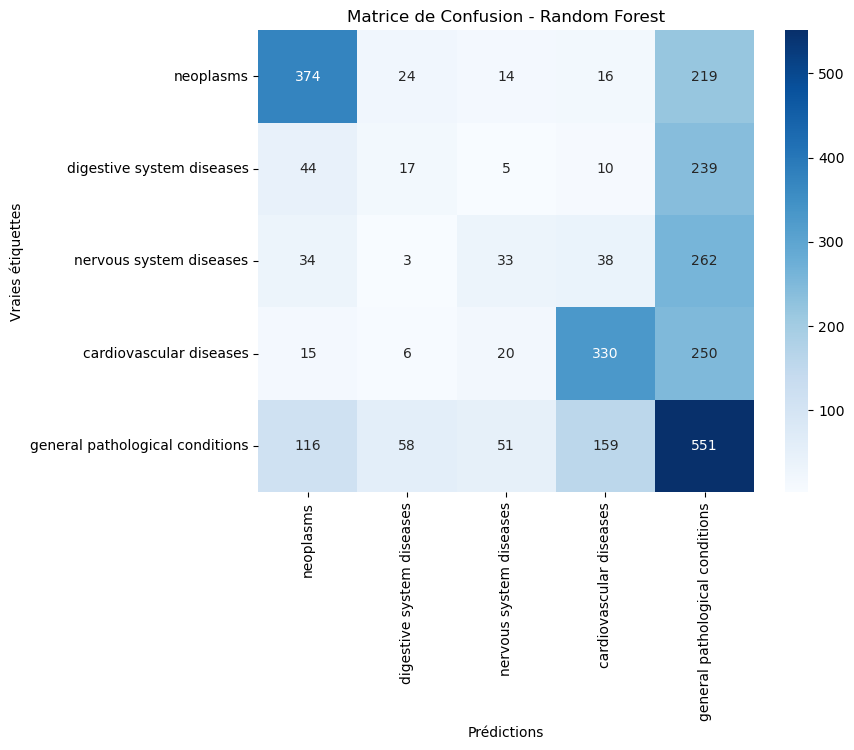

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


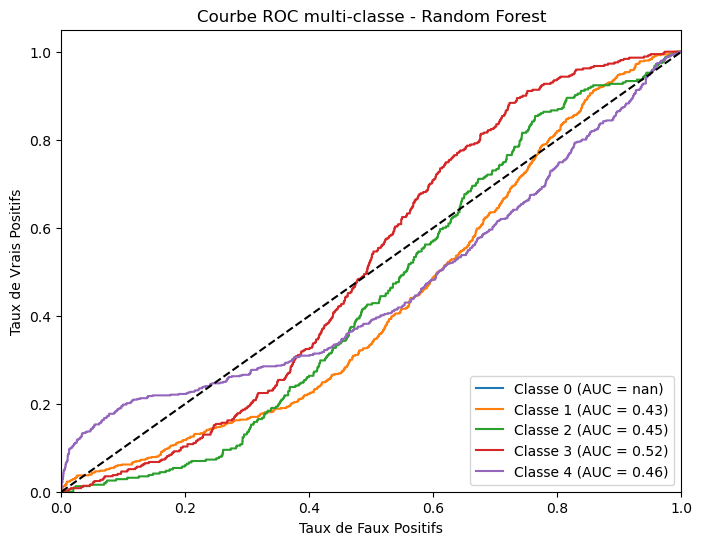

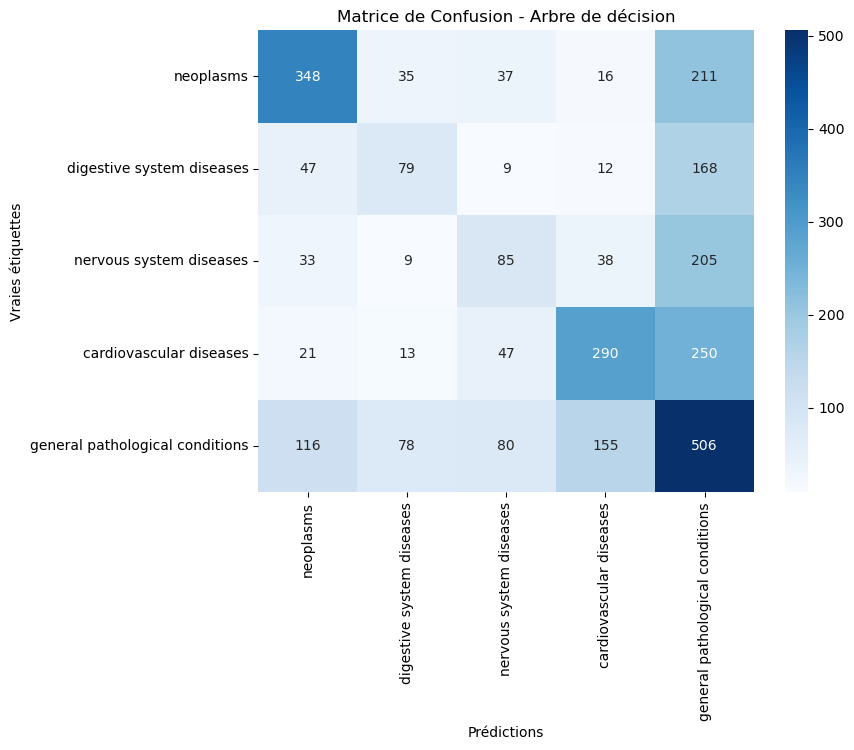

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


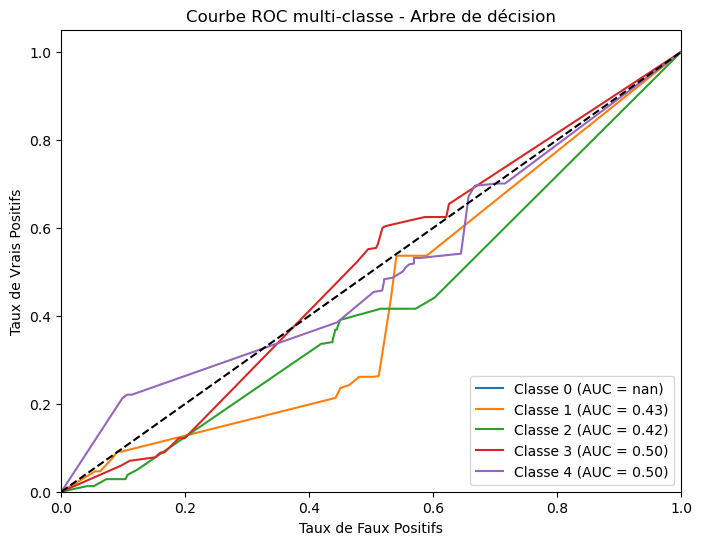

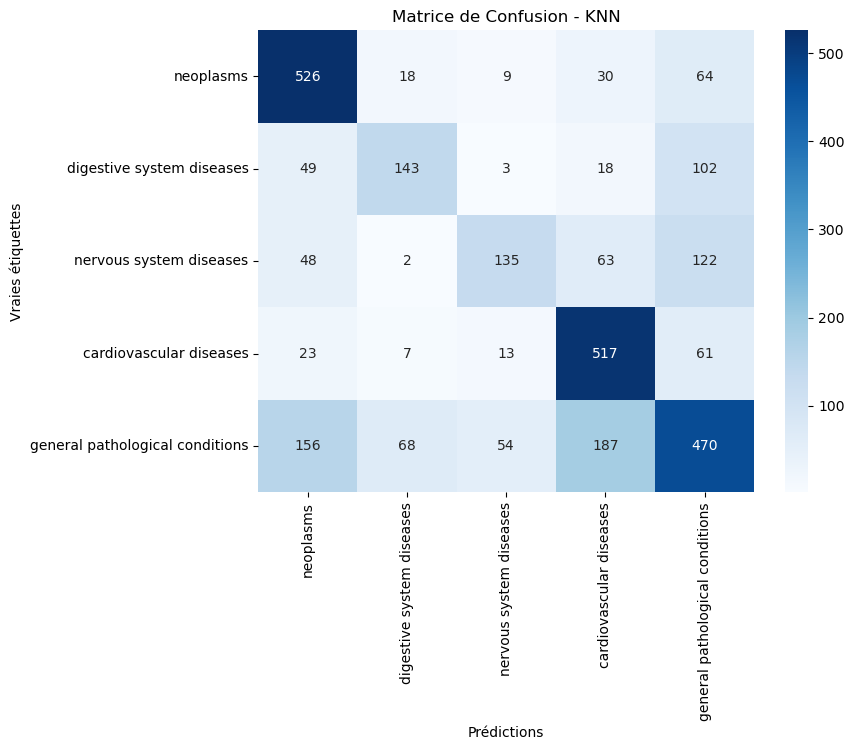

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


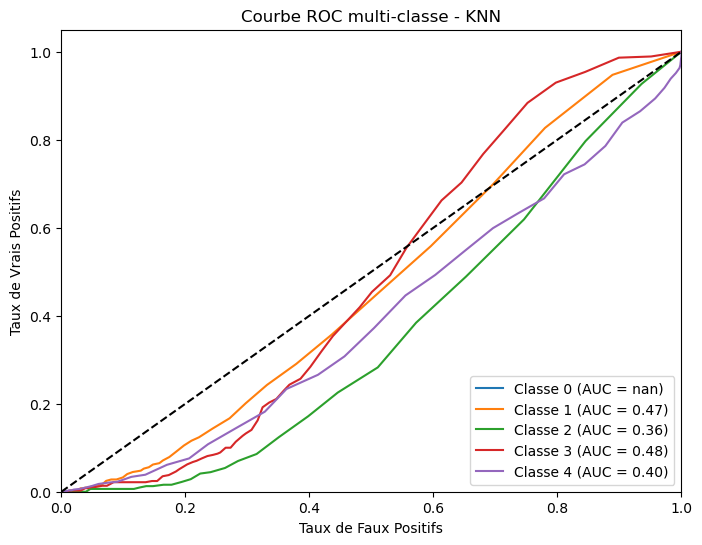

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize

# Fonctions pour la matrice de confusion et la courbe ROC
def plot_confusion_matrix(y_true, y_pred, model_name, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=classes, yticklabels=classes)
    plt.ylabel('Vraies étiquettes')
    plt.xlabel('Prédictions')
    plt.title(f'Matrice de Confusion - {model_name}')
    plt.show()

def plot_multiclass_roc_curve(y_true, y_score, model_name, n_classes):
    # Binariser les étiquettes
    y_true_bin = label_binarize(y_true, classes=list(range(n_classes)))
    
    # Initialisation des variables pour les courbes ROC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')
    
    # Tracer la diagonale
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taux de Faux Positifs')
    plt.ylabel('Taux de Vrais Positifs')
    plt.title(f'Courbe ROC multi-classe - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Exemple de classes
classes = [
    'neoplasms', 
    'digestive system diseases', 
    'nervous system diseases', 
    'cardiovascular diseases', 
    'general pathological conditions'
]

# Supposons que nous ayons 5 classes et des probabilités pour chaque classe pour les modèles
n_classes = 5

# Pour Random Forest
y_scores_rf = rf_model.predict_proba(X_test)  # Probabilités pour toutes les classes
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest", classes)
plot_multiclass_roc_curve(y_test, y_scores_rf, "Random Forest", n_classes)

# Pour Arbre de décision
y_scores_dt = dt_model.predict_proba(X_test)
plot_confusion_matrix(y_test, y_pred_dt, "Arbre de décision", classes)
plot_multiclass_roc_curve(y_test, y_scores_dt, "Arbre de décision", n_classes)

# Pour KNN
y_scores_knn = knn_model.predict_proba(X_test)
plot_confusion_matrix(y_test, y_pred_knn, "KNN", classes)
plot_multiclass_roc_curve(y_test, y_scores_knn, "KNN", n_classes)

# Pour K-means, pas de probabilités, donc uniquement la matrice de confusion
#plot_confusion_matrix(y_test, labels_test, "Kmeans", classes)

In [35]:
# Aplatir norm_corpus
norm_corpus_flat = [item[0] for item in norm_corpus]  # Extraire la première chaîne de chaque sous-liste
norm_corpus_flat

['catheter laboratori event hospit outcom direct angioplasti acut myocardi infarct to assess safeti direct infarct angioplasti without anteced thrombolyt therapi catheter laboratori hospit event assess consecut treat patient infarct involv left anterior descend n patient right n circumflex n coronari arteri the group patient similar age left anterior descend coronari arteri year right coronari arteri year circumflex coronari arteri year patient multivessel diseas left anterior descend coronari arteri right coronari arteri circumflex coronari arteri patient initi grade antegrad flow left anterior descend coronari arteri right coronari arteri circumflex coronari arteri cardiogen shock present eight patient infarct left anterior descend coronari arteri four infarct right coronari arteri four infarct circumflex coronari arteri major catheter laboratori event cardiovers cardiopulmonari resuscit dopamin intraaort balloon pump support hypotens urgent surgeri occur patient infarct left anterio

In [36]:
# Cacule de TF_IDF avec SKlearn
tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_matrix = tv.fit_transform(norm_corpus_flat)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names_out()
tf_idf = pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)
tf_idf.shape
tf_idf.head(10)

,0001,0002,001,003,005,008,01,02,032,05,...,zygos,zylor,zymodem,zymogen,zymogram,zymographi,zymosan,zymosanactiv,zymosanstimul,zzygo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# Filtrer qlq colomnes
tf_idf_f=tf_idf.filter(items=['patient','tumor','case','treatment', 'disease'])
tf_idf_f.head(20)

,patient,tumor,case,treatment,disease
0,0.10,0.00,0.00,0.00,0.0
1,0.02,0.05,0.08,0.00,0.0
2,0.04,0.00,0.00,0.00,0.0
3,0.00,0.00,0.11,0.00,0.0
4,0.00,0.00,0.00,0.02,0.0
5,0.13,0.00,0.00,0.08,0.0
6,0.04,0.00,0.00,0.00,0.0
7,0.04,0.00,0.06,0.06,0.0
8,0.03,0.00,0.02,0.00,0.0
9,0.00,0.00,0.00,0.00,0.0
